## Project Lab 2 Part 2
**Names:** [maxime rousseau, xuebin huang]  
**Student Numbers:** [76799170， 21936661]

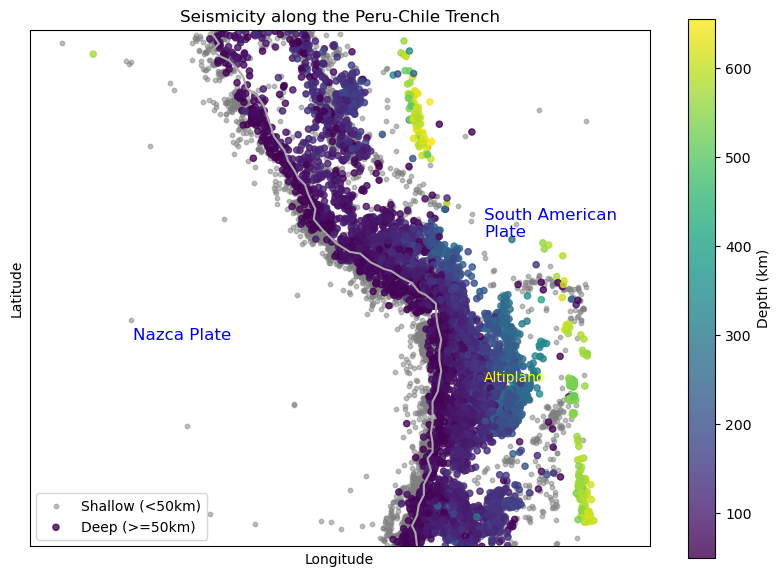

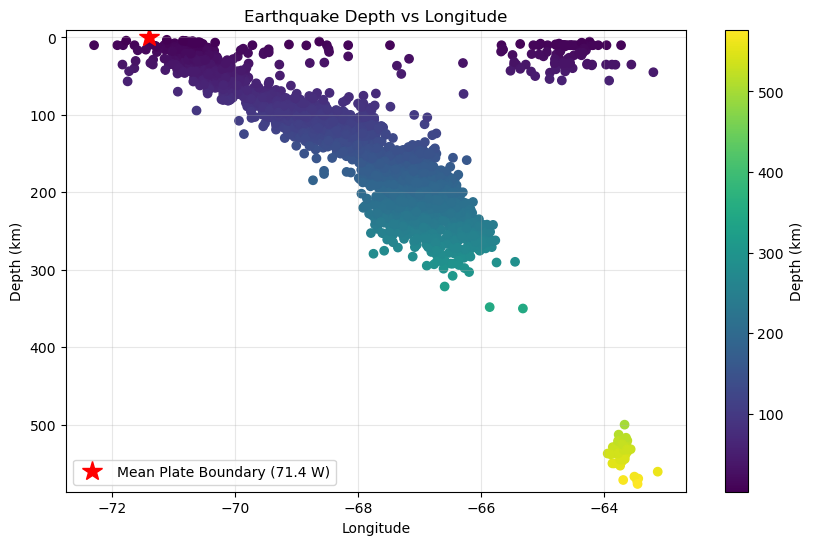

Slope 1 (Shallow/Mid): 20.81 degrees
Slope 2 (Mid/Deep):    43.96 degrees


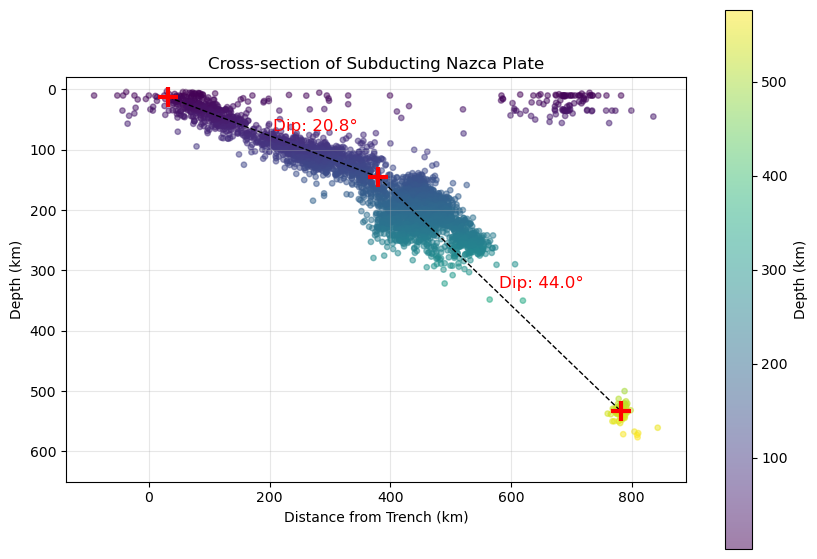

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import earthquake_fns as ef  




#C1. Large-scale observations of South American earthquakes.

# Load Data
file_coast = 'm_coasts.csv' 
file_plates = 'all_boundaries.csv'
file_quakes = 'merged_eq_010100_112025_mag4.csv' 
lon_coast, lat_coast = ef.get_coastlines(file_coast)
plates_dict = ef.get_plate_boundaries(file_plates)
df = ef.get_earthquakes(file_quakes)
# -90E to -60E, -30N to -5N
region_lons = [-90, -60]
region_lats = [-30, -5]
#Shallow (< 50 km)
df_shallow = ef.select_quake_subset(df, lons=region_lons, lats=region_lats, depths=[0, 49.99])
#Deep (>= 50 km)
df_deep = ef.select_quake_subset(df, lons=region_lons, lats=region_lats, depths=[50, 800])
lat_s, lon_s, dep_s, mag_s, time_s = ef.parse_earthquakes_to_np(df_shallow)
lat_d, lon_d, dep_d, mag_d, time_d = ef.parse_earthquakes_to_np(df_deep)
# Figure 1: Map
plt.figure(figsize=(10, 10))
# Coastlines
plt.plot(lon_coast, lat_coast, color='darkgray')
# Plate Boundaries
for name, coords in plates_dict.items():
    plt.plot(coords[:, 0], coords[:, 1], 'k-', linewidth=2) 
    plt.scatter(coords[:, 0], coords[:, 1], color='black', s=40, zorder=3)
# Shallow Quakes (Gray markers)
plt.scatter(lon_s, lat_s, color='gray', s=10, alpha=0.5, label='Shallow (<50km)')
# Deep Quakes (Colored by depth)
sc = plt.scatter(lon_d, lat_d, c=dep_d, cmap='viridis', s=20, alpha=0.8, label='Deep (>=50km)')

plt.xlim(region_lons)
plt.ylim(region_lats)
plt.gca().set_aspect('equal')
plt.colorbar(sc, label='Depth (km)', shrink=0.7)
plt.title('Seismicity along the Peru-Chile Trench')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.text(-85, -20, 'Nazca Plate', fontsize=12, color='blue')
plt.text(-68, -15, 'South American\nPlate', fontsize=12, color='blue')
plt.text(-68, -22, 'Altiplano', fontsize=10, color='yellow')
plt.legend()
plt.show()





#C2: Local observations of seismicity in the subducting Nazca Plate

#Lat (-25, -22), Lon (-75, -60)
sub_lats = [-25, -22]
sub_lons = [-75, -60]
df_local = ef.select_quake_subset(df, lons=sub_lons, lats=sub_lats)
lat_loc, lon_loc, dep_loc, mag_loc, time_loc = ef.parse_earthquakes_to_np(df_local)
# Figure 2.2: Depth vs longtitude
plt.figure(figsize=(10, 6))
plt.scatter(lon_loc, dep_loc, c=dep_loc)
plt.colorbar(label='Depth (km)')
# Plot average plate boundary
avg_pb_lon = -71.4
plt.plot(avg_pb_lon, 0, 'r*', markersize=15, label='Mean Plate Boundary (71.4 W)')
plt.xlabel('Longitude')
plt.ylabel('Depth (km)')
plt.title('Earthquake Depth vs Longitude')
plt.ylim(max(dep_loc) + 10, -10) # Invert Y axis
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




# C3: Subduction Angle (Dip)

# 1. Convert Longitude to Distance (km)
# Approximation: dist = dx (deg) * 111.19 km/deg * cos(mean_latitude)
mean_lat_rad = np.radians(np.mean(sub_lats))
km_per_deg_lon = 111.19 * np.cos(mean_lat_rad)
distances = (lon_loc - avg_pb_lon) * km_per_deg_lon

# 2. Calculate Medians for specific criteria
# Depth < 20, Distance < 50
mask1 = np.logical_and(dep_loc < 20, distances < 50)
x1 = np.median(distances[mask1])
y1 = np.median(dep_loc[mask1])
#Depths between 140 km and 150 km
mask2 = np.logical_and(dep_loc >= 140, dep_loc <= 150)
x2 = np.median(distances[mask2])
y2 = np.median(dep_loc[mask2])
# Depths > 500
mask3 = (dep_loc > 500)
x3 = np.median(distances[mask3])
y3 = np.median(dep_loc[mask3])
# Calculate Slopes
slope1 = ef.get_slope((x1, y1), (x2, y2))
slope2 = ef.get_slope((x2, y2), (x3, y3))
print(f"Slope 1 (Shallow/Mid): {slope1:.2f} degrees")
print(f"Slope 2 (Mid/Deep):    {slope2:.2f} degrees")
# Figure 3: Distance vs Depth
plt.figure(figsize=(10, 10))
plt.scatter(distances, dep_loc, c=dep_loc, cmap='viridis', s=15, alpha=0.5)

# Plot median points and lines
plt.plot([x1, x2], [y1, y2], 'k--', linewidth=1)
plt.plot([x2, x3], [y2, y3], 'k--', linewidth=1)
plt.plot(x1, y1, 'r+', markeredgewidth=3, markersize=15)
plt.plot(x2, y2, 'r+', markeredgewidth=3, markersize=15)
plt.plot(x3, y3, 'r+', markeredgewidth=3, markersize=15)

plt.text((x1+x2)/2, (y1+y2)/2 - 10, f'Dip: {slope1:.1f}°', fontsize=12, color='red')
plt.text((x2+x3)/2, (y2+y3)/2 - 10, f'Dip: {slope2:.1f}°', fontsize=12, color='red')

plt.title('Cross-section of Subducting Nazca Plate')
plt.xlabel('Distance from Trench (km)')
plt.ylabel('Depth (km)')
plt.ylim(650, -20) # Invert Y axis
plt.gca().set_aspect('equal') # Equal aspect ratio
plt.colorbar(label='Depth (km)', shrink=0.7)
plt.grid(True, alpha=0.3)
plt.show()



### C1.3:
Shallow earthquakes are located near the ocean trench.

Deep earthquakes are found further inland to the East.

The earthquakes follow the line of the plate boundary between the Nazca and South American plates.

### C2.3:
As longitude moves East, the depth of the earthquakes increases.

The earthquakes form a diagonal band going downward.

There is a continuous line of seismic activity from the surface down to deep depths

### C3.4:
The calculated slopes match the visual trend in the plots. The dip angle is smaller near the surface and becomes steeper as the plate goes deeper.


### 